### Objective
The objective of this python notebook is to use Auto Integrated Movong Average (ARIMA) to predict monthly crude palm oil prices.



#### Data
Monthly crude palm oil prices were retrieved from index mundi:https://www.indexmundi.com/commodities/?commodity=palm-oil&months=300 for the periods 1984 and 2021

#### Mount Google Drive to Google Colab Notebook

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#### Use pip to install to install required packages: pmdarima and matplotlib==3.1.3

In [ ]:
!pip install matplotlib==3.1.3

  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 6.0 MB/s 
     |████████████████████████████████| 9.5 MB 23.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as plt
from matplotlib import pyplot as pllt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/Univariate Crude Palm Oil Price Prediction/Data/crude_palmoil_price.csv")
data.head(5)

,Month,cpo_pri
0,1990-05,281
1,1990-06,272
2,1990-07,279
3,1990-08,291
4,1990-09,284


In [ ]:
dates = pd.date_range(start='1990-05-01', freq='MS', periods=len(data))

In [ ]:
import calendar
data['Month'] = dates.month
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])
data['Year'] = dates.year

In [ ]:
data.rename(columns={'Number of Tractor Sold':'cpo_pri'}, inplace=True)
data = data[['Month', 'Year', 'cpo_pri']]

In [ ]:
data.set_index(dates, inplace=True)

In [ ]:
data.head(5)

,Month,Year,cpo_pri
1990-05-01,May,1990,281
1990-06-01,Jun,1990,272
1990-07-01,Jul,1990,279
1990-08-01,Aug,1990,291
1990-09-01,Sep,1990,284


#### Get the time-series

In [ ]:
data_ts = data['cpo_pri']

#### Plot the time series data

Text(0, 0.5, 'cpo_pri')

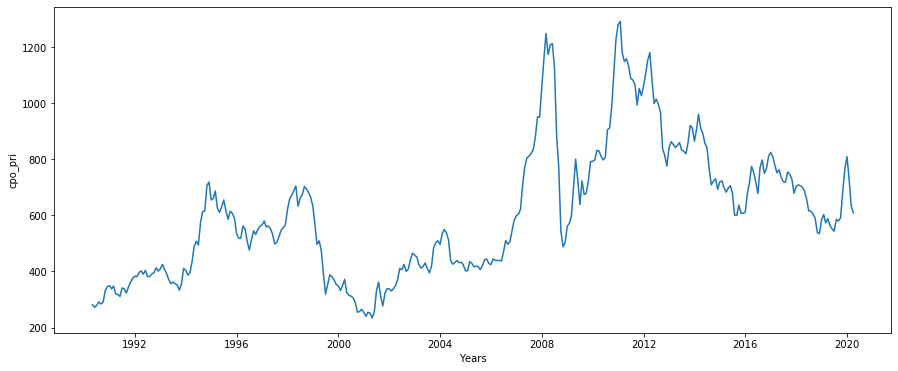

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(data_ts)
plt.xlabel('Years')
plt.ylabel('cpo_pri')

#### Apply moving averages of various window widths such as 4, 6, 8 and 12.

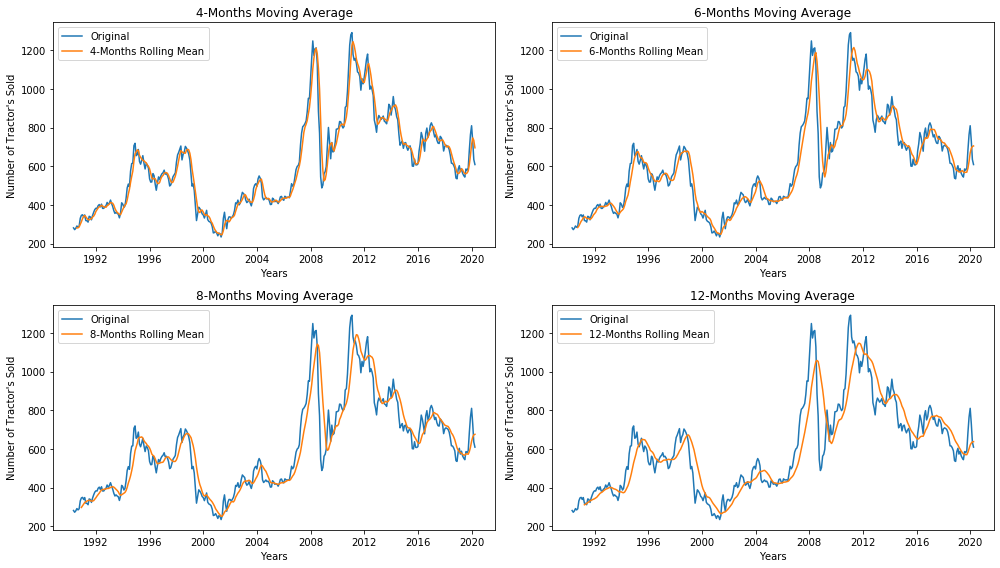

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)
axes[0][0].plot(data_ts.index, data_ts, label='Original')
axes[0][0].plot(data_ts.index, data_ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Number of Tractor's Sold")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')
axes[0][1].plot(data_ts.index, data_ts, label='Original')
axes[0][1].plot(data_ts.index, data_ts.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Number of Tractor's Sold")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')
axes[1][0].plot(data_ts.index, data_ts, label='Original')
axes[1][0].plot(data_ts.index, data_ts.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Tractor's Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')
axes[1][1].plot(data_ts.index, data_ts, label='Original')
axes[1][1].plot(data_ts.index, data_ts.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Tractor's Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')
plt.tight_layout()
plt.show()

#### Determine the rolling statistics

In [ ]:
rolmean = data_ts.rolling(window = 4).mean()
rolstd = data_ts.rolling(window = 4).std()

#### Plot the rolling statistics

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

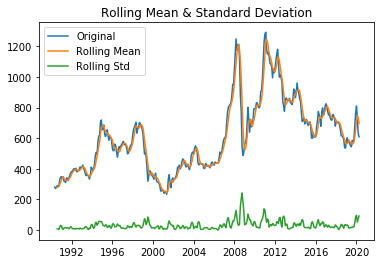

In [ ]:
import matplotlib.pyplot as plt
orig = plt.plot(data_ts, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

#### Apply Dickey-Fuller test to check if the time-series is stationary or not

In [ ]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(data_ts)
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -2.369
DF test p-value is 0.1507


#### Inference
The F statistics result is negative and the p-value is greater than 0.05. We do not reject the null hypothesis; the series is nonstationary. This implies that the series needs differencing.

In [ ]:
monthly_data_data = pd.pivot_table(data, values = "cpo_pri", columns = "Year", index = "Month")
monthly_data_data

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Apr,NaN,319.0,402.0,392.0,434.0,625.0,562.0,562.0,688.0,509.0,372.0,251.0,349.0,412.0,538.0,429.0,439.0,710.0,1174.0,702.0,830.0,1149.0,1181.0,842.0,911.0,683.0,775.0,752.0,701.0,588.0,609.0
Aug,291.0,338.0,382.0,356.0,575.0,616.0,513.0,504.0,674.0,354.0,306.0,362.0,425.0,395.0,432.0,407.0,510.0,821.0,885.0,723.0,905.0,1083.0,997.0,829.0,766.0,601.0,771.0,718.0,615.0,586.0,NaN
Dec,346.0,376.0,401.0,411.0,719.0,590.0,561.0,566.0,663.0,354.0,265.0,338.0,465.0,510.0,423.0,429.0,583.0,950.0,503.0,792.0,1228.0,1027.0,776.0,912.0,693.0,607.0,811.0,679.0,535.0,764.0,NaN
Feb,NaN,338.0,382.0,425.0,387.0,661.0,518.0,580.0,659.0,561.0,332.0,240.0,330.0,452.0,535.0,403.0,445.0,605.0,1160.0,572.0,798.0,1292.0,1106.0,863.0,908.0,723.0,679.0,809.0,709.0,603.0,729.0
Jan,NaN,349.0,383.0,410.0,404.0,655.0,535.0,567.0,621.0,632.0,348.0,254.0,338.0,458.0,496.0,402.0,424.0,599.0,1059.0,562.0,793.0,1281.0,1061.0,841.0,865.0,720.0,612.0,825.0,703.0,585.0,810.0
Jul,279.0,341.0,382.0,362.0,494.0,655.0,476.0,498.0,661.0,319.0,312.0,330.0,406.0,411.0,426.0,417.0,471.0,811.0,1128.0,639.0,807.0,1089.0,1015.0,833.0,841.0,680.0,678.0,720.0,616.0,544.0,NaN
Jun,272.0,311.0,404.0,356.0,508.0,631.0,508.0,533.0,633.0,392.0,315.0,255.0,411.0,430.0,440.0,419.0,437.0,805.0,1213.0,726.0,798.0,1133.0,999.0,860.0,857.0,706.0,718.0,735.0,657.0,552.0,NaN
Mar,NaN,348.0,396.0,408.0,395.0,687.0,519.0,559.0,671.0,497.0,349.0,254.0,338.0,426.0,550.0,435.0,440.0,622.0,1249.0,598.0,832.0,1180.0,1153.0,854.0,961.0,699.0,716.0,779.0,706.0,573.0,635.0
May,281.0,318.0,390.0,371.0,488.0,611.0,552.0,553.0,705.0,475.0,324.0,234.0,371.0,417.0,513.0,417.0,440.0,772.0,1208.0,801.0,811.0,1159.0,1085.0,849.0,893.0,697.0,753.0,763.0,687.0,564.0,NaN


In [ ]:
monthly_data_data = monthly_data_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_data_data

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Jan,NaN,349.0,383.0,410.0,404.0,655.0,535.0,567.0,621.0,632.0,348.0,254.0,338.0,458.0,496.0,402.0,424.0,599.0,1059.0,562.0,793.0,1281.0,1061.0,841.0,865.0,720.0,612.0,825.0,703.0,585.0,810.0
Feb,NaN,338.0,382.0,425.0,387.0,661.0,518.0,580.0,659.0,561.0,332.0,240.0,330.0,452.0,535.0,403.0,445.0,605.0,1160.0,572.0,798.0,1292.0,1106.0,863.0,908.0,723.0,679.0,809.0,709.0,603.0,729.0
Mar,NaN,348.0,396.0,408.0,395.0,687.0,519.0,559.0,671.0,497.0,349.0,254.0,338.0,426.0,550.0,435.0,440.0,622.0,1249.0,598.0,832.0,1180.0,1153.0,854.0,961.0,699.0,716.0,779.0,706.0,573.0,635.0
Apr,NaN,319.0,402.0,392.0,434.0,625.0,562.0,562.0,688.0,509.0,372.0,251.0,349.0,412.0,538.0,429.0,439.0,710.0,1174.0,702.0,830.0,1149.0,1181.0,842.0,911.0,683.0,775.0,752.0,701.0,588.0,609.0
May,281.0,318.0,390.0,371.0,488.0,611.0,552.0,553.0,705.0,475.0,324.0,234.0,371.0,417.0,513.0,417.0,440.0,772.0,1208.0,801.0,811.0,1159.0,1085.0,849.0,893.0,697.0,753.0,763.0,687.0,564.0,NaN
Jun,272.0,311.0,404.0,356.0,508.0,631.0,508.0,533.0,633.0,392.0,315.0,255.0,411.0,430.0,440.0,419.0,437.0,805.0,1213.0,726.0,798.0,1133.0,999.0,860.0,857.0,706.0,718.0,735.0,657.0,552.0,NaN
Jul,279.0,341.0,382.0,362.0,494.0,655.0,476.0,498.0,661.0,319.0,312.0,330.0,406.0,411.0,426.0,417.0,471.0,811.0,1128.0,639.0,807.0,1089.0,1015.0,833.0,841.0,680.0,678.0,720.0,616.0,544.0,NaN
Aug,291.0,338.0,382.0,356.0,575.0,616.0,513.0,504.0,674.0,354.0,306.0,362.0,425.0,395.0,432.0,407.0,510.0,821.0,885.0,723.0,905.0,1083.0,997.0,829.0,766.0,601.0,771.0,718.0,615.0,586.0,NaN
Sep,284.0,323.0,391.0,352.0,614.0,586.0,545.0,525.0,703.0,388.0,288.0,310.0,400.0,420.0,439.0,421.0,497.0,835.0,771.0,674.0,912.0,1065.0,967.0,820.0,709.0,600.0,798.0,755.0,605.0,580.0,NaN


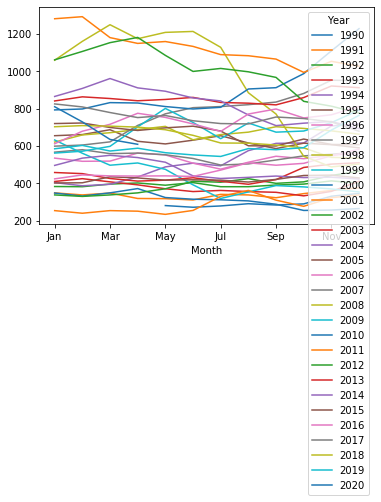

In [ ]:
monthly_data_data.plot()

In [ ]:
yearly_data_data = pd.pivot_table(data, values = "cpo_pri", columns = "Month", index = "Year")
yearly_data_data = yearly_data_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_data_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1990,NaN,NaN,NaN,NaN,281.0,272.0,279.0,291.0,284.0,290.0,331.0,346.0
1991,349.0,338.0,348.0,319.0,318.0,311.0,341.0,338.0,323.0,345.0,362.0,376.0
1992,383.0,382.0,396.0,402.0,390.0,404.0,382.0,382.0,391.0,396.0,413.0,401.0
1993,410.0,425.0,408.0,392.0,371.0,356.0,362.0,356.0,352.0,333.0,357.0,411.0
1994,404.0,387.0,395.0,434.0,488.0,508.0,494.0,575.0,614.0,616.0,707.0,719.0
1995,655.0,661.0,687.0,625.0,611.0,631.0,655.0,616.0,586.0,615.0,607.0,590.0
1996,535.0,518.0,519.0,562.0,552.0,508.0,476.0,513.0,545.0,532.0,550.0,561.0
1997,567.0,580.0,559.0,562.0,553.0,533.0,498.0,504.0,525.0,547.0,556.0,566.0
1998,621.0,659.0,671.0,688.0,705.0,633.0,661.0,674.0,703.0,694.0,681.0,663.0


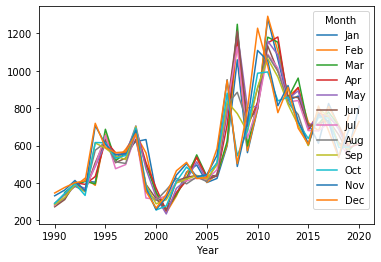

In [ ]:
yearly_data_data.plot()

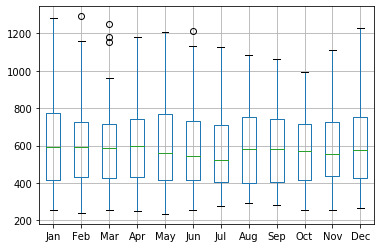

In [ ]:
yearly_data_data.boxplot()

### Decompose the time-series

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data_ts, model='multiplicative')

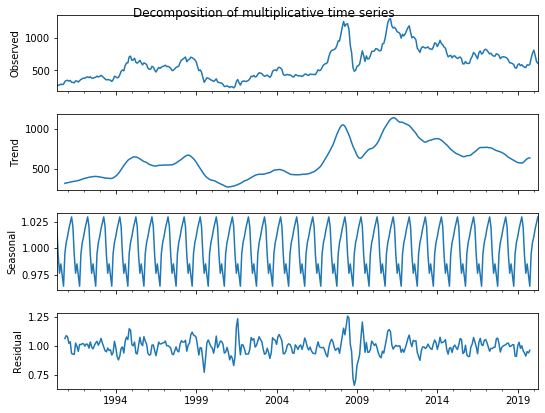

In [ ]:
fig = decomposition.plot()
fig.set_figwidth(8)
fig.set_figheight(6)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

Text(0, 0.5, 'cpo_pri')

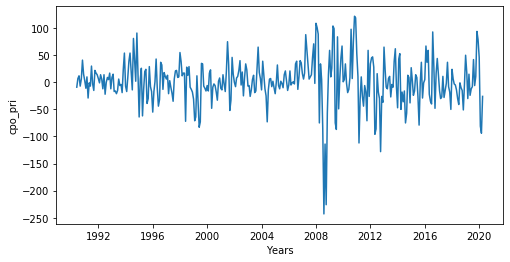

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(data_ts.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('cpo_pri')

Text(0, 0.5, 'Log (cpo_pri)')

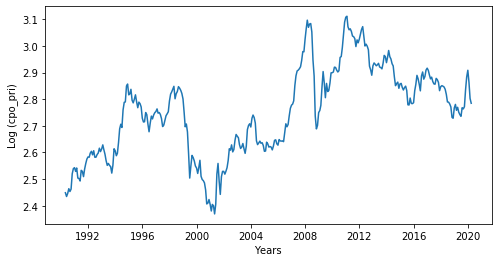

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(np.log10(data_ts))
plt.xlabel('Years')
plt.ylabel('Log (cpo_pri)')

Text(0, 0.5, 'Differenced Log (cpo_pri)')

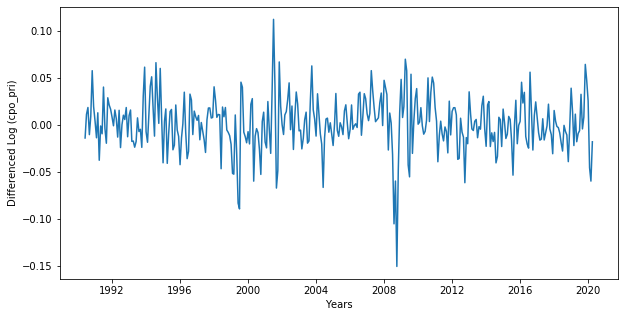

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(data_ts).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (cpo_pri)')

#### Autocorrelation and Partial Autocorrelation Function

In [ ]:
data_ts_log = np.log10(data_ts)
data_ts_log.dropna(inplace=True)

data_ts_log_diff = data_ts_log.diff(periods=1) # same as ts_log_diff = ts_log - ts_log.shift(periods=1)
data_ts_log_diff.dropna(inplace=True)

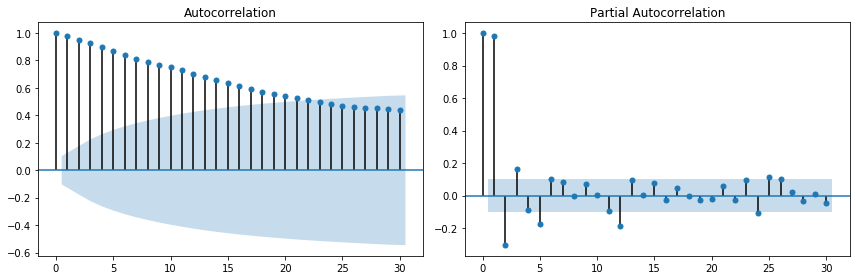

In [ ]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(data_ts_log, lags=30, ax=axes[0])
smt.graphics.plot_pacf(data_ts_log, lags=30, ax=axes[1])
plt.tight_layout()

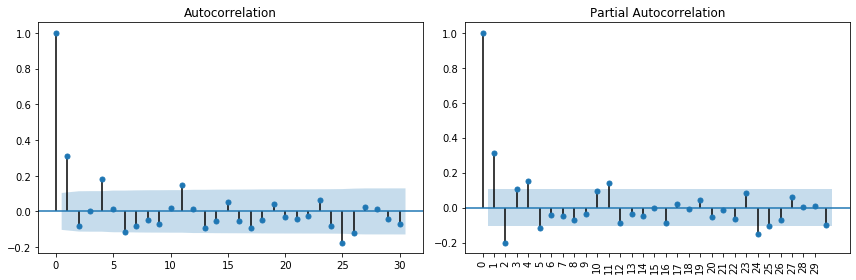

In [ ]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
plt.xticks(range(0,30,1), rotation = 90)
smt.graphics.plot_acf(data_ts_log_diff, lags=30, ax=axes[0])
smt.graphics.plot_pacf(data_ts_log_diff, lags=30, ax=axes[1])
plt.tight_layout()

In [ ]:
# Import the library
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

#### Split data into train / test sets

In [ ]:
train = data.iloc[:len(data)-36]
test = data.iloc[len(data)-36:] # set one year(36 months) for testing
train_data_ts_log = np.log10(train['cpo_pri'])


 Training data start at 

           Month  Year  cpo_pri
1991-04-01   Apr  1991      319
1992-04-01   Apr  1992      402
1993-04-01   Apr  1993      392
1994-04-01   Apr  1994      434
1995-04-01   Apr  1995      625
1996-04-01   Apr  1996      562
1997-04-01   Apr  1997      562
1998-04-01   Apr  1998      688
1999-04-01   Apr  1999      509
2000-04-01   Apr  2000      372
2001-04-01   Apr  2001      251
2002-04-01   Apr  2002      349
2003-04-01   Apr  2003      412
2004-04-01   Apr  2004      538
2005-04-01   Apr  2005      429
2006-04-01   Apr  2006      439
2007-04-01   Apr  2007      710
2008-04-01   Apr  2008     1174
2009-04-01   Apr  2009      702
2010-04-01   Apr  2010      830
2011-04-01   Apr  2011     1149
2012-04-01   Apr  2012     1181
2013-04-01   Apr  2013      842
2014-04-01   Apr  2014      911
2015-04-01   Apr  2015      683
2016-04-01   Apr  2016      775
2017-04-01   Apr  2017      752 ['Year', 'Month']

 Training data ends at 

           Month  Year  cpo_pri
1

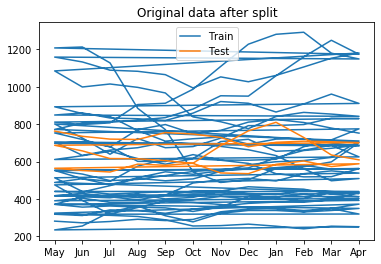

In [ ]:
 print("\n Training data start at \n")
print (train[train.Month == train.Month.min()],['Year','Month'])
print("\n Training data ends at \n")
print (train[train.Month == train.Month.max()],['Year','Month'])

print("\n Test data start at \n")
print (test[test.Month == test.Month.min()],['Year','Month'])

print("\n Test data ends at \n")
print (test[test.Month == test.Month.max()],['Year','Month'])

plt.plot(train.Month, train.cpo_pri, label = 'Train')
plt.plot(test.Month, test.cpo_pri,  label = 'Test')
plt.legend(loc = 'best')
plt.title('Original data after split')
plt.show()

In [ ]:
# Fit auto_arima function to the crude palm oil price dataset
stepwise_fit = auto_arima(train_data_ts_log, start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=5.18 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-413.269, Time=0.14 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-1174.852, Time=3.01 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-765.498, Time=2.77 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-410.639, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-1113.628, Time=0.13 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-1211.414, Time=9.45 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=12.47 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=4.52 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=-444.594, Time=2.39 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=-1244.361, Time=11.84 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=-1211.116, Time=3.97 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=14.93 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=5.04 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  324
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 12)   Log Likelihood                 632.904
Date:                            Fri, 03 Sep 2021   AIC                          -1253.808
Time:                                    02:37:52   BIC                          -1231.350
Sample:                                         0   HQIC                         -1244.833
                                            - 324                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3400      0.061     21.919      0.000       1.220       1.460
ar.L2         -0.5554      0.092     -6.024      0.000      -0.736      -0.375
ar.L3          0.1798      0.048      3.711      0.000       0.085       0.275
ar.S.L12      -0.6203      0.047    -13.215      0.000      -0.712      -0.528
ar.S.L24      -0.3649      0.058     -6.344      0.000      -0.478      -0.252
sigma2         0.0010   6.74e-05     14.616      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                       93.90   Jarque-Bera (JB):                59.09
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.42   Skew:                            -0.23
Prob(H) (two-sided):                  0.08   Kurtosis:                         5.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Fit a SARIMAX(3, 0, 1)x(2, 1, 0, 12) on the training set

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['cpo_pri'], 
                order = (3, 0, 0), 
                seasonal_order =(2, 1, 0, 12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                            cpo_pri   No. Observations:                  324
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -1642.500
Date:                            Fri, 03 Sep 2021   AIC                           3297.000
Time:                                    02:39:33   BIC                           3319.458
Sample:                                05-01-1990   HQIC                          3305.976
                                     - 04-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3317      0.059     22.635      0.000       1.216       1.447
ar.L2         -0.4309      0.084     -5.127      0.000      -0.596      -0.266
ar.L3          0.0543      0.040      1.361      0.174      -0.024       0.133
ar.S.L12      -0.6607      0.041    -15.942      0.000      -0.742      -0.579
ar.S.L24      -0.3527      0.054     -6.489      0.000      -0.459      -0.246
sigma2      2128.6648    140.134     15.190      0.000    1854.007    2403.323
===================================================================================
Ljung-Box (Q):                      126.45   Jarque-Bera (JB):               104.04
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.47   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

####  Predictions of ARIMA Model against the test set

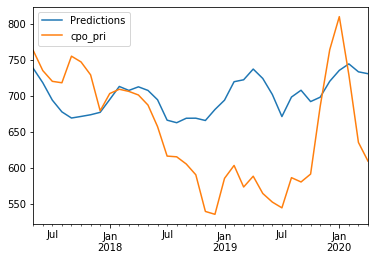

In [ ]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['cpo_pri'].plot(legend = True)

#### Calculate the root mean square error

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
rmse(test["cpo_pri"], predictions)
  
# Calculate mean squared error
mean_squared_error(test["cpo_pri"], predictions)
print(rmse(test["cpo_pri"], predictions))

88.05777156298154


#### Train the model on the full dataset

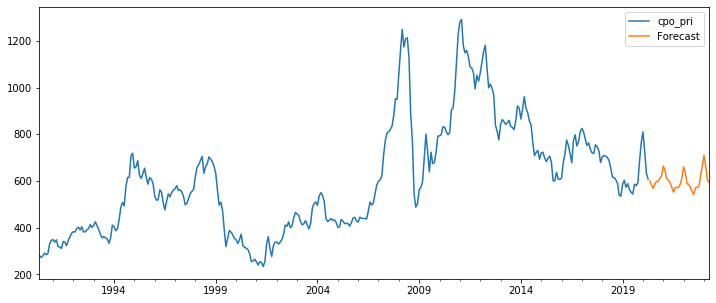

In [ ]:
model = model = SARIMAX(data['cpo_pri'], 
                        order = (3, 0, 0), 
                        seasonal_order =(2, 1, 0, 12))
result = model.fit()
  
# Forecast for the next 3 years
forecast = result.predict(start = len(data), 
                          end = (len(data)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
data['cpo_pri'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

In [ ]:
#Separate data into train and test
data['date'] = data.index
train = data[data.index < '2013-01-01']
test = data[data.index >= '2013-01-01']
train_data_ts_log = np.log10(train['cpo_pri'])


In [ ]:
train_len = 360
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set
train_data_ts_log = np.log10(train['cpo_pri'])

In [ ]:
train_data_ts_log

1990-05-01    2.448706
1990-06-01    2.434569
1990-07-01    2.445604
1990-08-01    2.463893
1990-09-01    2.453318
                ...   
2012-08-01    2.998695
2012-09-01    2.985426
2012-10-01    2.923762
2012-11-01    2.910091
2012-12-01    2.889862
Freq: MS, Name: cpo_pri, Length: 272, dtype: float64

In [ ]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(train_data_ts_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True)
            results = temp_model.fit()

            
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

Best SARIMAX(0, 1, 1)x(0, 0, 0, 12)12 model - AIC:-1166.6563477123234


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
########
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
best_model = sm.tsa.statespace.SARIMAX(train_data_ts_log,
                                      order=(1, 1, 1),
                                      seasonal_order=(1, 1, 1, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                            cpo_pri   No. Observations:                  272
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 544.448
Date:                            Fri, 03 Sep 2021   AIC                          -1078.897
Time:                                    00:26:48   BIC                          -1061.112
Sample:                                05-01-1990   HQIC                         -1071.746
                                     - 12-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0357      0.129      0.278      0.781      -0.216       0.288
ma.L1          0.3664      0.123   

In [ ]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=True, full_results=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


In [ ]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [ ]:
pred99 = best_results.get_forecast(steps=100, alpha=0.1)

In [ ]:
# Extract the predicted and true values of our time series
data_ts_forecasted = pred_dynamic.predicted_mean
testCopy = test.copy()
testCopy['data_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [ ]:
testCopy

,Month,Year,cpo_pri,date,sales_ts_forecasted
2013-01-01,Jan,2013,841,2013-01-01,758.859560
2013-02-01,Feb,2013,863,2013-02-01,759.584438
2013-03-01,Mar,2013,854,2013-03-01,767.583629
2013-04-01,Apr,2013,842,2013-04-01,776.568742
2013-05-01,May,2013,849,2013-05-01,773.129187
...,...,...,...,...,...
2019-12-01,Dec,2019,764,2019-12-01,1038.749741
2020-01-01,Jan,2020,810,2020-01-01,1040.337354
2020-02-01,Feb,2020,729,2020-02-01,1043.197069
2020-03-01,Mar,2020,635,2020-03-01,1055.011364


In [ ]:
# Compute the root mean square error
mse = ((testCopy['cpo_pri'] - testCopy['data_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 240.25


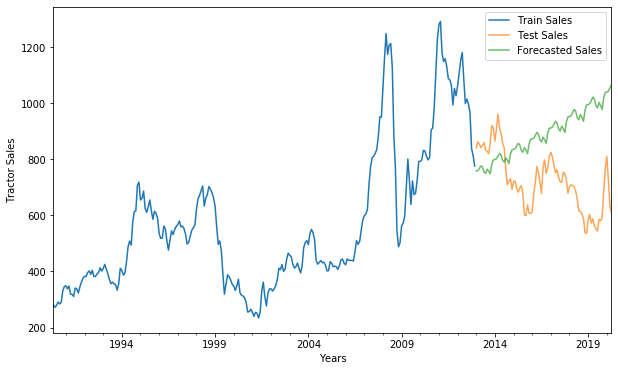

In [ ]:
axis = train['cpo_pri'].plot(label='Train data', figsize=(10, 6))
testCopy['cpo_pri'].plot(ax=axis, label='Test data', alpha=0.7)
testCopy['data_ts_forecasted'].plot(ax=axis, label='Forecasted data', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor data')
plt.legend(loc='best')
plt.show()
plt.close()